# Генеративно-состязательная нейросеть (Generative adversarial network, GAN)
## Теоретическая часть
**Генеративно-состязательная нейросеть (Generative adversarial network, GAN)** — алгоритм машинного обучения без учителя, построенный на комбинации из двух нейронных сетей - генератора, генирирующего образцы и дискриминатора, отличающего правильные  образцы от неправильных.

Формирование изображений начинается с генерации произвольного шума, на котором постепенно начинают проступать фрагменты искомого изображения. В качестве **генерирующей нейронной сети могут использоваться сети FFNN** – нейронные сети прямого распространения (feed forward neural networks).

В роли **дискриминатора выступают сверточные нейронные сети CNN** (convolutional neural network).

Так как сети генеративные и дискриминаторные сеи имеют противоположные цели — создать образцы и отбраковать образцы — между ними возникает антагонистическая игра.

Впервые генеративно-состязательную сеть описал **Ян Гудфеллоу** из компании Google в 2014 году.

### Общая архитектура генеративно-состязательной нейросети GAN


### Виды генеративно-состязательных нейросетей (GAN)
<ol>
  <li>Глубокая сверточная сеть (DCGAN - Deep Convolutional Generative Adversarian Network)</li>
  <li>Улучшенная глубокая сверточная сеть (Improved DCGAN)</li>
  <li>Условная сеть (Conditional GAN)</li>   
  <li>Информационная сеть (InfoGAN)</li>
  <li>Сеть Вассерштайна (Wasserstein GAN)</li>   
  <li>Улучшенная сеть Вассерштайна (Improved WGAN)</li>    
  <li>Сеть граничного равновесия (BEGAN – Boundary Equilibrium GAN)</li>  
  <li>Прогресcирующая GAN (ProGAN)</li>      
  <li>Цикличная сеть (CycleGAN)</li>       
</ol>

### Решаемые задачи
Генеративно-состязательные сети используюсфтся для самых разных задач, где требуется генерировать реалистичные изображения. Например для повышения разрешения изображения:
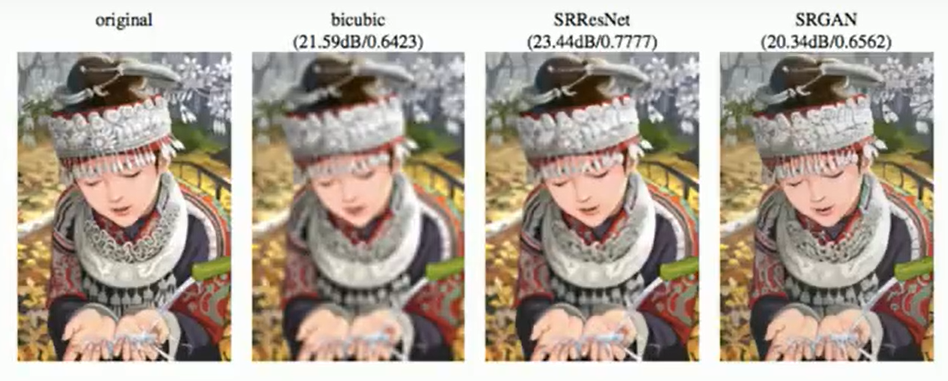

Формирование изображений по схеме и, наоборот, построение схемы карты по изображению:


На основе GAN можно формировать интересный эффект, когда берется мужское лицо с очками, вычитается мужское лицо без очков и прибавляется женское лицо. На выходе генератор выдает женские лица в очках:


### Устройство генеративно-состязательной нейросети
На вход дискриминатора сначало подается реальное изображение, затем, на выходе дискриминатора получается некоторое чилсло: назовем его **real**. В другой момент времени подаём на вход дискриминатора сгенерированное изображение и на выходе получаем второе значение: назовём его **fake**.

**real** – для реальных изображений;

**fake** – для сгенерированных;

Пусть эти два числа меняются от **0** до **1** и их можно воспринимать как **степень уверенности** дискриминатора в том, что изображение реальное или сгенерированное. То есть, при подаче реальных изображений сеть должна выдавать число близкое к 1. А для сгенерированных, наоборот, близкое к 0:
$$
\begin{equation}
\left\{
	\begin{array}{ll}
		 real → 1;\\
         fake → 0;
	\end{array}\right.
\end{equation}
$$

Так как мы делаем различия между двумя классами (**real** и **fake**), то в качестве показателя качества целесообразно взять бинарную кросс-энтропию:
$$
\begin{equation}
\left\{
	\begin{array}{ll}
		 loss \_ dis \_ real = -t_R \cdot \log(real) - (1 - t_R) \cdot \log(1 - real);\\
         loss \_ dis \_ fake = -t_F \cdot \log(fake) - (1 - t_F) \cdot \log(1 - fake);
	\end{array}\right.
\end{equation}
$$ 
где $$t_R = 1, t_F = 0$$ - желаемые отклики сети. Упрощая и суммируя эти потери, получаем:

$$
   loss \_ dis = -\log(real) - \log(1 - fake);
$$

Из этой формулы видно, что показатель качества должен быть минимален для реальных изображений и максимален для сгенерированных. Получили критерий качества для дискриминатора.
В свою очередь дискриминатор выступает критерием качества для генератора. То есть, генератор должен так построить изображение, чтобы дискриминатор не смог его отличить от реального:
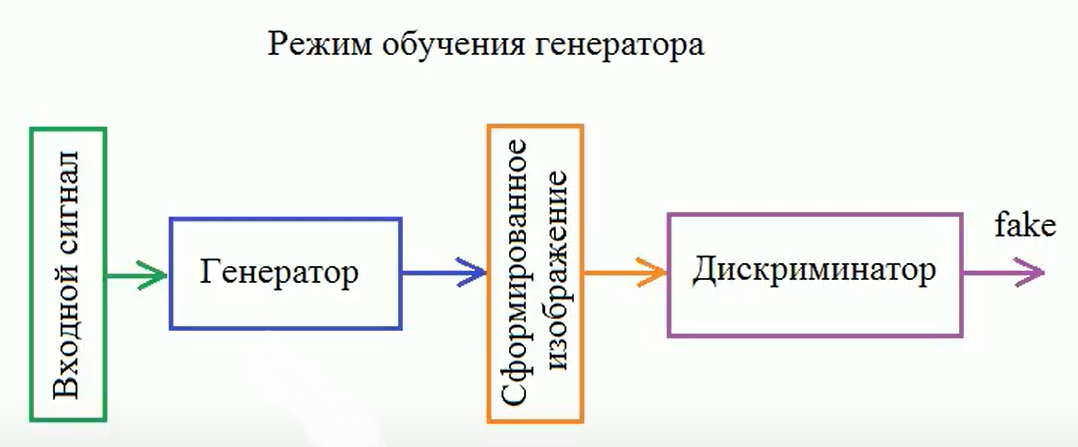

Значит, в режиме обучения генератора в бинарной кросс-энтропии требуемый отклик $$t_F = 1;$$

Получаем критерий качества:
$$
 loss \_ gen = -t_F \cdot \log(fake) - (1 - t_F) \cdot \log(1 - fake);\\
 loss \_ gen = -\log(fake);
$$

Дискриминатор и генератор как бы конкурируют друг с другом и обучаются так, чтобы дискриминатор пытался правильно отличить реальное изображение от сгенерированного, а генератор пытается так сгенирировать изображение, чтобы дискриминатор не смог этого сделать. В результате такой конкуренции дискриминатор все лучше и лучше различает реальные и фейковые изображения, а генератор все точнее и точнее генерирует реалистичные изображения. В идеале генератор должен формировать изображения неотличимые от реальных, чтобы дискриминатор уже не смог их различать. Это пример того, как взаимная конкуренция приводит к развитию обеих нейронных сетей. Отсюда и пошло название «генеративно-состязательные».

## Резюмирование концепции работы GAN
Берём наборы реальных изображений близких к тем, что должен выдавать генератор. Затем, подаем на вход дискриминатора случайно выбранное одно реальное изображение и вычисляем значение real. Затем, на вход дискриминатора подаем сгенерированное изображение и вычисляем значение fake. В соответствии с функцией потерь loss_dis (дискриминатора) обучаем его алгоритмом обратного распространения ошибки. На следующем шаге подаем на вход дискриминатора сгенерированное изображение и по значению fake выполняем обучение уже генератора. Так, поочередно, обучая то одну, то другую сеть, мы их улучшаем в соответствии с нашими критериями.

## Практическая часть
Реализуем простую генеративно-состязательную нейронную сеть.
На вход генератора будем подавать случайные величины, распределенные по нормальному закону с нулевым математическим ожиданием и единичной дисперсией:


Реализуем раздельный процесс обучения генератора и дискриминатора с помощью модулей Keras и Tensorflow.
Чтобы генератор лучше формировал изображения, их следует взять однотипными. Например, из базы MNIST выбрать только семерки:

### Инициализация, подготовка обучающей выборки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
 
from tensorflow.keras.datasets import mnist
from tensorflow import keras
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, BatchNormalization, Dropout
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, LeakyReLU

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # загружаем коллекцию с с рукописными цифрами (mnist)
 
x_train = x_train[y_train==5] # выделяем все пятерки
y_train = y_train[y_train==5]  

In [3]:
BUFFER_SIZE = x_train.shape[0] # определяем размер обучающей выборки (буфера)
BATCH_SIZE = 100 # устанавливаем размер деления выборки (батча)

In [4]:
BUFFER_SIZE = BUFFER_SIZE // BATCH_SIZE * BATCH_SIZE # делаем общую выборку кратную величине BATCH_SIZE
x_train = x_train[:BUFFER_SIZE] # обрезаем выборку до размера буфера
y_train = y_train[:BUFFER_SIZE]
print(x_train.shape, y_train.shape)

(5400, 28, 28) (5400,)


Изображение цифр подготовлены для дальнейшей работы

In [5]:
x_train = x_train / 255 # стандартизируем входные данные
x_test = x_test / 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) # формируем тензоры
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape, x_test.shape)

(5400, 28, 28, 1) (10000, 28, 28, 1)


In [6]:
# формируем тензор реальных изображений, разбитых по батчам
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE) 
# делим выборку на батчи и перемешиваем

Обучающая выборка готова

### Определим генератор и дискриминатор

In [7]:
# формирование сетей
hidden_dim = 2 # вектор нормальных независимых случайных величин на вход генератора
 
def dropout_and_batch():
  return Dropout(0.3)(BatchNormalization()) #боримся с переобучением
 
# генератор 
generator = tf.keras.Sequential([ #создаем последовательную модель Sequential
  Dense(7*7*256, activation='relu', input_shape=(hidden_dim,)), # формируем первый полносвязный слой, где функция активации relu, input_shape - размерность входных данных 
  BatchNormalization(), # применяем к сллою Dense слой нормализации для предотвращения ковариационного сдвига
  Reshape((7, 7, 256)), # результат формируем в тензор
  Conv2DTranspose(128, (5, 5) , strides=(1, 1), padding='same', activation='relu'),# слой сверточной сети, где 128 каналов с ядром 5х5 и шагом oX=1, oY=1
# padding='same' - выходная карта признаков на каждом канале должна быть той же размерностью, что и исходное изображение
  BatchNormalization(), 
  Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', activation='relu'), 
  BatchNormalization(), 
  Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='sigmoid'),
])

# у функции активации relu на выходе получаем значения от 0 до бесконечности
# у функции активации sigmoid на выходе получаем значения от 0 до 1

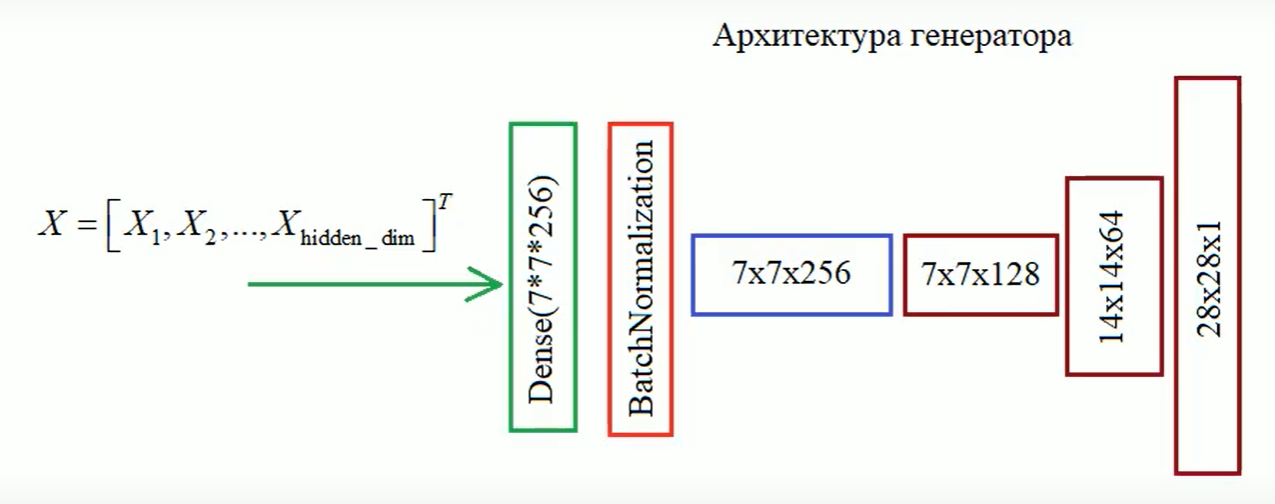

На вход полносвязного слоя "Dense", состоящий из: $$7\cdot7\cdot256$$ числа нейронов, подаём вектор нормальных независимых случайных величин.
Выходы со слоя "Dense" пропускаем через слой "BatchNormalization", и то, что находится на выходе этого слоя, превращаем в тензор: $$7\cdot7\cdot256$$ с помощью "Reshape".
Далее необходимо пропустить наш тензор через свёрточные слои, так как генератор, в нашем случае, формирует изображения, а с изображениями лучше всего работать с помощью свёрточных нейронных сетей.

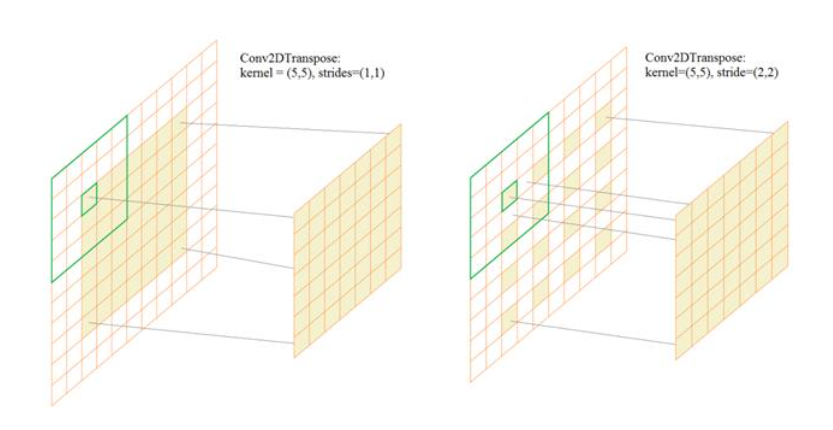

Первый слой: 128 каналов, ядро 5 на 5, шаг (1,1).
На вход подаётся карта признаков 7 на 7 элементов. Затем, карта проходит через ядро 5 на 5 и на выходе получаем карту признаков тоже 7 на 7 элементов. То есть при проходе через первый свёрточный слой мы не масшатаббируем карту признаков. На выходе поучаем тензор: $$7\cdot7\cdot128$$

Второй слой: 64 канала, ядро 5 на 5, шаг (2,2). На вход подаём карту признаков 7 на 7 элементов, но элементы ставим через один "отсчёт". Затем, карта проходит через ядро 5 на 5 и на выходе получаем карту признаков уже 14 на 14 элементов. Таким образом мы масшатббируем карту признаков. На выходе получаем тензор: $$14\cdot14\cdot64$$

Третий слой: 1 канал, ядро 5 на 5, шаг (2,2).На вход подаём карту признаков 7 на 7 элементов, но элементы ставим через один "отсчёт". Затем, карта проходит через ядро 5 на 5 и на выходе получаем карту признаков уже 28 на 28 элементов. На выходе получаем тензор (изображение, сгенерированное генератором): $$28\cdot28\cdot1$$

In [8]:
# дискриминатор
discriminator = tf.keras.Sequential() #создаем последовательную модель Sequential
discriminator.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1])) #добавляем слой 2D свертки
discriminator.add(LeakyReLU()) #функция активции LeakyReLU 
discriminator.add(Dropout(0.3))
 
discriminator.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU())
discriminator.add(Dropout(0.3))
 
discriminator.add(Flatten()) #добавляем слой Flatten используемый для конвертации входящих данных в меньшую размерность
discriminator.add(Dense(1)) #добавляем полносвязны слой

На входе ожидаем изображение 28х28 пикселей, а на выходе имеем один нейрон с линейной функцией активации. Такая функция выбрана не случайно. Она предотвращает попадание в области насыщения, которые имеются у других функций, например, сигмоидальной или гиперболического тангенса. Линейная функция не ограничивает выходное значение, а значит, не уменьшает результирующие градиенты. Это очень важно при обучении такой сети.

In [9]:
# потери генератора и дискриминатора
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True) # создаем функцию потерь - бинарная кросс-энтропия, from_logits=True - значение в [-inf,inf]
 
def generator_loss(fake_output):
  loss = cross_entropy(tf.ones_like(fake_output), fake_output) # желаемый и реальный output(отклик)
  return loss
 
def discriminator_loss(real_output, fake_output): # output для реальных и сгенерированных изображений
  real_loss = cross_entropy(tf.ones_like(real_output), real_output) # формируем тензор из едениц
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output) # формируем тензор из нулей
  total_loss = real_loss + fake_loss
  return total_loss

Используем встроенную функцию BinaryCrossentropy пакета Keras для вычисления бинарной кросс-энтропии. Далее, в функции generator_loss в бинарной кросс-энтропии передаем два параметра: желаемый и реальный отклики. У генератора желаемый отклик дискриминатора должен быть: $$t_F = 1;$$

Именно это мы и указываем первым параметром tf.ones_like(fake_output). Метод "ones_like" формирует единичный вектор (состоящий из единиц) и его размерность точно такая же, как размерность тензора fake_output. А второй – это действительное значение на дискриминаторе. В итоге получаем вычисления по формуле: $$loss \_ gen = -\log(fake);$$

По аналогии вычисляются потери для дискриминатора. Ему на вход последовательно будем подавать реальное и фейковое изображения, получать два разных отклика real_output и fake_output и на их основе вычислять потери в соответствии с формулой:

$$
   loss \_ dis = -\log(real) - \log(1 - fake);
$$

Здесь требуемые отклики равны: $$t_R = 1, t_F = 0$$ что и указывается первыми параметрами функции кросс-энтропии.

После определения потерь, зададим оптимизаторы для алгоритма градиентного спуска по Адаму с шагом 0,0001.
Адам - это алгоритм, который оптимизирует случайную целевую функцию на основе шага.

In [10]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### Функция для выполнения одного шага обучения по батчу

In [11]:
@tf.function # через декоратор @tf.function определим функцию одного шага обучения для ускорения выполнения функций
def train_step(images): # подаём батч реальных изображений
  noise = tf.random.normal([BATCH_SIZE, hidden_dim]) # создаем велечину шума для генерации фейковых изображений
 
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape: # созданиие градиентов для генератора и дискриминатора
    generated_images = generator(noise, training=True) # генерируем фейковые изображения
    # training=True - слой нормализует свои входные данные, используя среднее значение и дисперсию текущего пакета входных данных
    
    # дискриминатор с реальными и фейковми изображенями
    real_output = discriminator(images, training=True) 
    fake_output = discriminator(generated_images, training=True)
 
    # вычисляем потери генератора и дискриминатора
    gen_loss = generator_loss(fake_output) 
    disc_loss = discriminator_loss(real_output, fake_output) 
 
  # вычисляем градиент генератора и дискриминатора
  # первый акргумеент - функция потерь, ворой - оптимизируемые аргументы, от которых зависит целевая функция 
  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables) 
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
   
  # применяем градиенты для генератора и дискриминатора для изменения весов
  # первый аргумент - список градиенетов, ворой - оптимизируемые весовые коэффициенты
  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
 
  return gen_loss, disc_loss # возвращаем потери генератора и дискриминатора за 1 батч

На вход функции train_step подаем пакет (батч) реальных изображений. Затем, формируем также один батч нормальных случайных величин длиной hidden_dim. Их мы подаем на вход генератора. Так как нам будут нужны градиенты для сети генератора и дискриминатора, то мы их вычислим с помощью инструмента Tensorflow GradientTape. Он сохраняет необходимые результаты арифметических операции для дальнейшего вычисления градиентов. Это довольно продвинутый инструмент автоматического дифференцирования.

Объекты gen_tape и disc_tape будут содержать необходимые данные для последующего вычисления градиентов изменяемых параметров (то есть, весов сетей) в точках, соответствующих входным данным.

Благодаря тесной интеграции пакета Keras и Tensorflow, при прохождении сигнала по генератору и дискриминатору, в объекты gen_tape и disc_tape автоматически записываются необходимые данные. То же самое происходит и при вычислении потерь для обеих сетей.

Теперь, все что нам нужно для вычисления градиентов, это вызвать метод gradient объектов gen_tape и disc_tape. В качестве первого параметра указываем целевую функцию, то есть, функцию потерь, а вторым параметром – оптимизируемые аргументы, от которых зависит эта целевая функция. Конечно, аргументы здесь – это веса соответствующих сетей.

После вычисления градиентов, мы их применяем для изменения весов, используя метод apply_gradients объекта оптимизатора. В качестве параметра передаем список градиентов и оптимизируемых весовых коэффициентов. Это и есть момент обучения сети. Делаем это независимо для генератора и дискриминатора.

В конце, возвращаем значения потерь для генератора и дискриминатора.


### Функция запуска процесса обучения
Объявим функцию, которая будет запускать весь процесс обучения сетей. На ее вход будем передавать обучаемую выборку изображений, разбитой по батчам и число эпох:

In [12]:
def train(dataset, epochs):
  history = []
  MAX_PRINT_LABEL = 10
  th = BUFFER_SIZE // (BATCH_SIZE * MAX_PRINT_LABEL)
 
  for epoch in range(1, epochs + 1):
    print(f'{epoch}/{EPOCHS}: ', end='')
 
    start = time.time()
    n = 0
 
    gen_loss_epoch = 0
    for image_batch in dataset: # цикл обучения по батчам
      gen_loss, disc_loss = train_step(image_batch)
      gen_loss_epoch += K.mean(gen_loss) # вычисляем средние потери для генератора по батчам
      if( n % th == 0): print('=', end='')
      n += 1
 
    history += [gen_loss_epoch / n]
    print(': ' + str(history[-1]))
    print ('Время эпохи {} составляет {} секунд'.format(epoch, time.time()-start))
     
  return history # массив истории потерь для генератора 

Вначале определяем вспомогательные переменные. И, затем, делаем цикл по эпохам. Для каждой эпохи замеряем время ее выполнения и запускаем цикл обучения по батчам, вызывая функцию train_step. Далее, вычисляем средние потери для генератора по батчам и выводим результат в консоль, а также сохраняем в коллекции history. В конце возвращаем историю изменения потерь для генератора.

### Запуск обучения и анализ реультата

1/20: ===========: tf.Tensor(1.3464475, shape=(), dtype=float32)
Время эпохи 1 составляет 49.90980410575867 секунд
2/20: ===========: tf.Tensor(2.3466034, shape=(), dtype=float32)
Время эпохи 2 составляет 40.710097789764404 секунд
3/20: ===========: tf.Tensor(3.056967, shape=(), dtype=float32)
Время эпохи 3 составляет 40.933632612228394 секунд
4/20: ===========: tf.Tensor(3.1148424, shape=(), dtype=float32)
Время эпохи 4 составляет 40.55324721336365 секунд
5/20: ===========: tf.Tensor(3.2730541, shape=(), dtype=float32)
Время эпохи 5 составляет 40.52794170379639 секунд
6/20: ===========: tf.Tensor(3.4989245, shape=(), dtype=float32)
Время эпохи 6 составляет 40.701175928115845 секунд
7/20: ===========: tf.Tensor(3.5754745, shape=(), dtype=float32)
Время эпохи 7 составляет 40.50064182281494 секунд
8/20: ===========: tf.Tensor(3.0895293, shape=(), dtype=float32)
Время эпохи 8 составляет 40.41120934486389 секунд
9/20: ===========: tf.Tensor(1.5290544, shape=(), dtype=float32)
Время эпохи 9

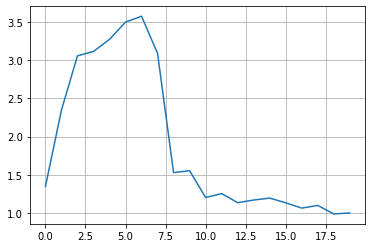

In [13]:
# запуск процесса обучения
EPOCHS = 20
history = train(train_dataset, EPOCHS)
 
plt.plot(history)
plt.grid(True)
plt.show()

Здесь наблюдается некоторый колебательный процесс. И это естественно. Сначала происходит резкое увеличение потерь из-за преимущественного обучения дискриминатора (он учится отличать реальные изображения от фейковых). Затем, немного обучившись, градиенты для генератора стали больше градиентов дискриминатора и потери генератора стали уменьшаться (изображения на его выходе становятся реалистичнее). Далее, опять видим небольшие всплески – это моменты улучшения дискриминатора и в целом все это доходит до некоторого равновесного состояния. В идеале, генератор должен выдавать изображения неотличимые от реальных и дискриминатор с вероятностью 0,5 может их различать, то есть, не различать вовсе.

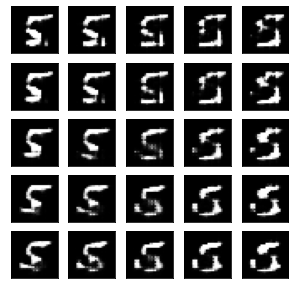

In [14]:
# отображение результатов генерации
n = 2
total = 2 * n + 1
 
plt.figure(figsize=(total, total))
 
num = 1
for i in range(-n, n + 1):
  for j in range(-n, n + 1):
    ax = plt.subplot(total, total, num)
    num += 1
    img = generator.predict(np.expand_dims([0.5 * i / n, 0.5 * j / n], axis = 0))
    plt.imshow(img[0,:,:,0], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Теперь, обученный генератор можно использовать отдельно для формирования таких изображений.

1/100: ===========: tf.Tensor(0.8231434, shape=(), dtype=float32)
Время эпохи 1 составляет 39.923206090927124 секунд
2/100: ===========: tf.Tensor(1.0173056, shape=(), dtype=float32)
Время эпохи 2 составляет 40.23285365104675 секунд
3/100: ===========: tf.Tensor(0.8673161, shape=(), dtype=float32)
Время эпохи 3 составляет 39.927125215530396 секунд
4/100: ===========: tf.Tensor(0.9077677, shape=(), dtype=float32)
Время эпохи 4 составляет 39.838417768478394 секунд
5/100: ===========: tf.Tensor(0.9584706, shape=(), dtype=float32)
Время эпохи 5 составляет 41.92288088798523 секунд
6/100: ===========: tf.Tensor(0.89079213, shape=(), dtype=float32)
Время эпохи 6 составляет 42.3197124004364 секунд
7/100: ===========: tf.Tensor(0.8351311, shape=(), dtype=float32)
Время эпохи 7 составляет 42.17720890045166 секунд
8/100: ===========: tf.Tensor(0.9172939, shape=(), dtype=float32)
Время эпохи 8 составляет 43.66174077987671 секунд
9/100: ===========: tf.Tensor(0.859985, shape=(), dtype=float32)
Врем

71/100: ===========: tf.Tensor(0.83868647, shape=(), dtype=float32)
Время эпохи 71 составляет 40.74033212661743 секунд
72/100: ===========: tf.Tensor(0.8710041, shape=(), dtype=float32)
Время эпохи 72 составляет 40.844775676727295 секунд
73/100: ===========: tf.Tensor(0.87707555, shape=(), dtype=float32)
Время эпохи 73 составляет 40.44640803337097 секунд
74/100: ===========: tf.Tensor(0.8831349, shape=(), dtype=float32)
Время эпохи 74 составляет 40.4508159160614 секунд
75/100: ===========: tf.Tensor(0.8159211, shape=(), dtype=float32)
Время эпохи 75 составляет 40.64207172393799 секунд
76/100: ===========: tf.Tensor(0.7746472, shape=(), dtype=float32)
Время эпохи 76 составляет 39.97266221046448 секунд
77/100: ===========: tf.Tensor(0.90150726, shape=(), dtype=float32)
Время эпохи 77 составляет 39.769981384277344 секунд
78/100: ===========: tf.Tensor(0.78566974, shape=(), dtype=float32)
Время эпохи 78 составляет 39.985334634780884 секунд
79/100: ===========: tf.Tensor(0.9159191, shape=()

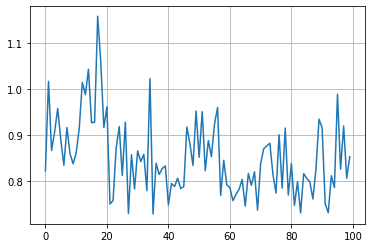

In [15]:
EPOCHS = 100
history = train(train_dataset, EPOCHS)
 
plt.plot(history)
plt.grid(True)
plt.show()

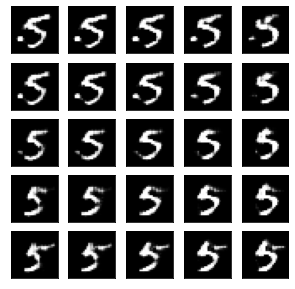

In [16]:
# отображение результатов генерации
n = 2
total = 2 * n + 1 
 
plt.figure(figsize=(total, total))
 
num = 1
for i in range(-n, n + 1):
  for j in range(-n, n + 1):
    ax = plt.subplot(total, total, num)
    num += 1
    img = generator.predict(np.expand_dims([0.5 * i / n, 0.5 * j / n], axis = 0))
    plt.imshow(img[0,:,:,0], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Выводы
Генеративно-состязательные сети, как правило, долго обучаются в сравнении с обычными сетями. Здесь приходится подстраивать весовые коэффициенты отдельно для дискриминатора, затем для генератора и это конкурирующее обучение необходимо повторять много раз для достижения приемлемых результатов. Поэтому число эпох может достигать 100 и более. Дополнительные сложности при обучении возникают из-за взаимного влияния дискриминатора и генератора друг на друга. Вполне может возникнуть ситуация, когда градиенты генератора будут близки к нулю и обучение попадает в некую ловушку, когда недообученный дискриминатор хорошо различает фейковые изображения недообученного генератора. При этом, генератор дальше не обучается из-за этих малых градиентов. Но все это можно преодолеть при грамотном подходе к обучению.

## Информационные источники 
1. [*Tensorflow 2.0*](https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ur)
2. [*Keras*](https://ru-keras.com/home/)
3. [Обзор модуля Tensorflow 2](https://www.youtube.com/channel/UClJzWfGWuGJL2t-3dYKcHTA)
4. [*Что такое генеративно-состязательные сети (GAN)*](https://proproprogs.ru/neural_network/chto-takoe-generativno-sostyazatelnye-seti-gan)
5. [Виды генеративно-созтязательных сетей](https://cyberleninka.ru/article/n/vidy-generativno-sostyazatelnyh-setey/viewer)
6. [Batch Normalization для ускорения обучения нейронных сетей](https://habr.com/ru/post/309302/)
7. [Отличие функции активации ReLU от LeakyReLU](https://congyuzhou.medium.com/leakyrelu-a76f04cf2c3d)
8. [Декоратор tf.function](https://proproprogs.ru/tensorflow/tf-dekorator-tffunction-dlya-uskoreniya-vypolneniya-funkciy)
9. [Flatten layer](https://keras.io/api/layers/reshaping_layers/flatten/d)